# 8) Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm
import pandas as pd
import numpy as np
%matplotlib inline

# Load the iris dataset
iris_dataset = pd.read_csv('Iris.csv')
iris_dataset['Targets']=iris_dataset.Class.map(
    {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
X = iris_dataset[['Sepal_Length','Sepal_Width','Petal_Length',
                  'Petal_Width']]
Y = iris_dataset[['Targets']]

#### Build K-Means Model

In [2]:
# K Means Cluster
model = KMeans(n_clusters=3,random_state=0)
model.fit(X)
print('Model Labels:\n',model.labels_) 

Model Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### Build GMM for EM algorithm

In [3]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xs = scaler.transform(X)
gmm = GaussianMixture(n_components=3,random_state=0)
gmm.fit(xs)
Y_gmm = gmm.predict(xs)
print('GMM Labels:\n',Y_gmm)

GMM Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Visualize the clustering results

Text(0, 0.5, 'Petal Width')

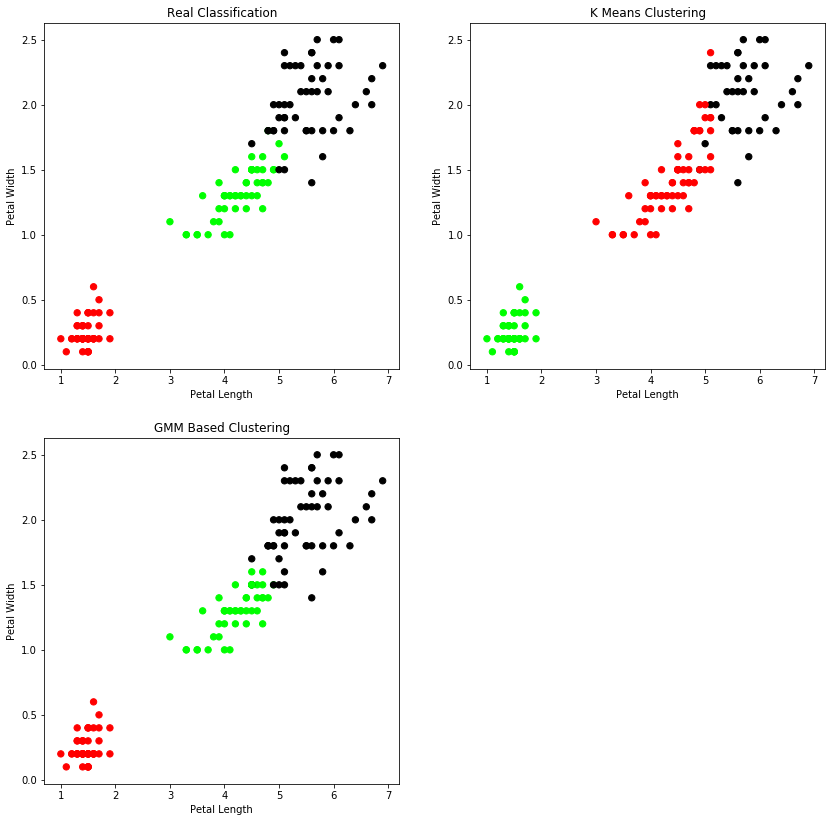

In [4]:
# To View the results set the size of the plot
plt.figure(figsize=(14,14))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

# Plot Orginal using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length,X.Petal_Width, 
            c=colormap[Y.Targets],s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot the K-Means model classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, 
            c=colormap[model.labels_],s=40)
plt.title('K Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

#Plot the GMM Model classification
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[Y_gmm],
            s=40)
plt.title('GMM Based Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

#### Calculate performance metrics for K-Means and GMM

In [6]:
print('Evaluation of K-Means with ground truth classification of Iris Dataset')
print('Rand Index:%0.4f' %sm.adjusted_rand_score(Y.Targets,model.labels_))
print('Homogenity Score:%0.4f' %sm.homogeneity_score(Y.Targets,model.labels_))
print('Completeness Score:%0.4f' %sm.completeness_score(Y.Targets,model.labels_))
print('V-Measure:%0.4f' %sm.v_measure_score(Y.Targets,model.labels_))

Evaluation of K-Means with ground truth classification of Iris Dataset
Rand Index:0.7302
Homogenity Score:0.7515
Completeness Score:0.7650
V-Measure:0.7582


In [8]:
print('Evaluation of GMM with ground truth classification of Iris Dataset')
print('Rand Index:%0.4f' %sm.adjusted_rand_score(Y.Targets,Y_gmm))
print('Homogenity Score:%0.4f'%sm.homogeneity_score(Y.Targets,Y_gmm))
print('Completeness Score:%0.4f'%sm.completeness_score(Y.Targets,Y_gmm))
print('V-Measure:%0.4f'%sm.v_measure_score(Y.Targets,Y_gmm))

Evaluation of GMM with ground truth classification of Iris Dataset
Rand Index:0.9039
Homogenity Score:0.8983
Completeness Score:0.9011
V-Measure:0.8997
